<a href="https://colab.research.google.com/github/Ruthra03/CBOW-algorithm-Multiword-context/blob/main/cbow_multiword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt

class CBOW:
    def __init__(self, vocab_size,word_index, W1, W2, reverse_word_index, embedding_dim, hidden_dim, learning_rate=0.001):

        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.learning_rate = learning_rate
        self.word_index = word_index
        self.reverse_word_index = reverse_word_index
        # Initialize weights randomly or load pre-trained weights
        self.W1 = np.random.rand(vocab_size, hidden_dim)
        self.W2 = np.random.rand(hidden_dim, vocab_size)
        #self.W1 = W1
        #self.W2 = W2


    def generate_one_hot(self, word_idx):
        one_hot = np.zeros(self.vocab_size)
        one_hot[int(word_idx)] = 1
        return one_hot

    def softmax(self, u):
        exp_u = np.exp(u)
        return exp_u / np.sum(exp_u)

    def forward_pass(self, context_words, W1):
        context_indices = [reverse_word_index[word] for word in context_words]
        context_weights = [W1[int(index)] for index in context_indices]
        h = np.mean(context_weights, axis = 0)
        #print(np.shape(h))
        u = np.dot(self.W2.T, h)
        #print(np.shape(W2.T))
        #print(np.shape(u))
        output_probs = self.softmax(u)
        return h, output_probs

    def backward_pass(self, context, target, h, output_probs):
        error_output = output_probs - target
        C = len(context)
        dW2 = np.outer(error_output, h)
        error_hidden = np.dot(self.W2, error_output)
        #dW1 = np.outer(error_hidden, context)
        dW1_accumulated = np.zeros((embedding_dim, hidden_dim))
        for con in context:
            dW1 = np.outer(error_hidden, con)
            dW1_accumulated += dW1.T
        self.update_weights(dW2.T,(1/C)*(dW1_accumulated))

    def update_weights(self, dW2, dW1):
        self.W1 -= self.learning_rate * dW1
        self.W2 -= self.learning_rate * dW2

    def train(self, corpus, vocabulary=None, epochs = None):
        losses = []
        for epoch in range(epochs):
            total_loss = 0.0
            for sentence in corpus:
                words_in_sentence = sentence.split()
                target_word = words_in_sentence[-1].lower()
                context_words = words_in_sentence[:-1]
                context_words_lower = [word.lower() for word in context_words]
                #print(context_words_lower)
                context_vector = [self.generate_one_hot(self.reverse_word_index[word]) for word in context_words_lower]
                context = [list(cont) for cont in context_vector]
                #print(context)
                h,output_probs = self.forward_pass(context_words_lower, W1)
                #print(output_probs)

                target = self.generate_one_hot(self.reverse_word_index[target_word])
                #print(target)
                j_star = int(target.argmax())

                loss = -np.log(output_probs[j_star])  # E = - ln(y)
                total_loss += loss
                self.backward_pass(context, target, h, output_probs)

            average_loss = total_loss / len(corpus)
            losses.append(average_loss)
        plt.plot(range(1, epochs + 1), losses, label='Average Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Average Loss')
        plt.title('Average Loss vs. Epochs')
        plt.xticks(range(0, epochs + 1, 1000))  # Set x-axis ticks to be divisible by 1000
        plt.legend()
        plt.show()

    def predict(self, input):
            words_in_sentence = input.split()
            context_words_lower = [word.lower() for word in words_in_sentence]
            h,output_probs = self.forward_pass(context_words_lower, W1)
            predicted_word_index = np.argmax(output_probs)
            predicted_word = self.word_index[str(predicted_word_index)]

            # Format the output probabilities as specified
            #formatted_probs = [f"{word}: {prob:.6f}" for word, prob in zip(self.word_index.values(), output_probs)]
            return predicted_word, output_probs

{'0': 'at', '1': 'the', '2': 'savings', '3': 'account', '4': 'bank', '5': 'cooperative', '6': 'personal', '7': 'loan'}
{'at': '0', 'the': '1', 'savings': '2', 'account': '3', 'bank': '4', 'cooperative': '5', 'personal': '6', 'loan': '7'}


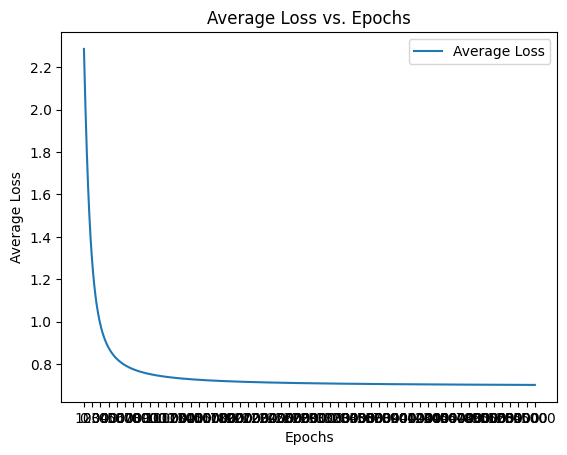

In [3]:

corpus = [
    "Savings account at the bank",
    "Savings account at the cooperative",
    "Personal loan at the bank",
    "Personal loan at the cooperative"
]
epochs = 55000
text_corpus = ' '.join(corpus)
# Tokenize the text into words
words = text_corpus.split()
lower_words = [word.lower() for word in words]
# Count the occurrences of each word
word_counts = Counter(lower_words)

#print(word_counts)
# Sort words by their counts in descending order
sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)
#print(sorted_words)

# Create a dictionary with unique words and assign an index
word_index = {'0': sorted_words[0]}  # Assign '0' to the most repeated word
word_index.update({str(i + 1): word for i, word in enumerate(sorted_words[1:])})
reverse_word_index = {value: key for key, value in word_index.items()}

print(word_index)
print(reverse_word_index)

vocab_size = len(word_counts)
embedding_dim = vocab_size
hidden_dim = 3

#W1 = np.random.rand(vocab_size, hidden_dim)
#W2 = np.random.rand(hidden_dim, vocab_size)
W1 =np.array([[0.46160097, 0.74899148, 0.14187272],
 [0.94515133, 0.33834598, 0.72275773],
 [0.06740351, 0.7846799, 0.69933224],
 [0.71270929, 0.54950206, 0.79055757],
 [0.25694203, 0.00418501, 0.08291655],
 [0.01766039, 0.39056123, 0.05566129],
 [0.65145548, 0.25379293, 0.20951265],
 [0.92299655, 0.32217441, 0.80460898],
 [0.69445758, 0.41962172, 0.90442852],
 [0.02898729, 0.70142395, 0.00113795],
 [0.10016165, 0.19304378, 0.14052748],
 [0.65303324, 0.48022398, 0.89423154]])
W2 = np.array([[0.43322864, 0.21848414, 0.60521956, 0.93159116, 0.71309709, 0.82640376, 0.4329049, 0.57828907, 0.90898569, 0.23259709, 0.25001241, 0.77770293],
 [0.73555021, 0.32475317, 0.49706922, 0.942417, 0.6227863, 0.43097231, 0.1931593,  0.03735458, 0.22277027, 0.44404313, 0.16870695, 0.94300161],
  [0.58103576, 0.7106269, 0.57265739, 0.796869, 0.18779333, 0.28260036, 0.78978276, 0.31641161, 0.255798, 0.58657335, 0.52959075, 0.4919738 ]])
#print(W1)
#print(W2)

cbow = CBOW(vocab_size, word_index, W1, W2, reverse_word_index, embedding_dim=embedding_dim, hidden_dim=hidden_dim)

cbow.train(corpus, sorted_words, epochs)

In [4]:
context = "Personal loan at the"
predicted_word, probs = cbow.predict(context)
print(f"Predicted word after '{context}': {predicted_word}")
print("Probabilities:")
for i in range(vocab_size):
  print(f"P({word_index[str(i)]}|{context})= {probs[i]}")

Predicted word after 'Personal loan at the': cooperative
Probabilities:
P(at|Personal loan at the)= 0.0013341493040584015
P(the|Personal loan at the)= 0.0014153193078867967
P(savings|Personal loan at the)= 0.0013666881644400783
P(account|Personal loan at the)= 0.0014305112727539776
P(bank|Personal loan at the)= 0.49476379504940016
P(cooperative|Personal loan at the)= 0.4972142124354837
P(personal|Personal loan at the)= 0.0012746677207345597
P(loan|Personal loan at the)= 0.0012006567452424789
